In [ ]:
import numpy as np  # array operations
import pandas as pd  # time series management
import matplotlib.pyplot as plt  # standard plotting library
from pylab import plt
plt.style.use('ggplot')
# put all plots in the notebook itself
%matplotlib inline

In [ ]:
symbol = 'CHCC'
data = pd.read_csv('PQ1.csv',
                   index_col=0, parse_dates=True)[symbol].dropna()
data = pd.DataFrame(data)

In [ ]:
data

In [ ]:
data['SMA42'] = data[symbol].rolling(window=42).mean()
data['SMA252'] = data[symbol].rolling(window=252).mean()
data.dropna(inplace=True)  # drop rows with NaN values

In [ ]:
data[[symbol, 'SMA42', 'SMA252']].plot(figsize=(10, 6));

In [ ]:
# vectorized evaluation of the trading condition/signal generation
data['position'] = np.where(data['SMA42'] > data['SMA252'], 1, -1)

In [ ]:
data[[symbol, 'position']].plot(subplots=True, figsize=(10, 6))
plt.ylim(-1.1, 1.1)  # adjust y-axis limits

In [8]:
# vectorized calculation of log returns
data['market'] = np.log(data[symbol] / data[symbol].shift(1))

In [9]:
data['market']

Date
2016-01-05         NaN
2016-01-06   -0.002709
2016-01-07   -0.007624
2016-01-08   -0.000984
2016-01-11    0.011209
                ...   
2019-12-24   -0.012043
2019-12-26    0.025215
2019-12-27   -0.030261
2019-12-30    0.002246
2019-12-31   -0.009390
Name: market, Length: 988, dtype: float64

In [10]:
# vectorized calculation of strategy returns
data['strategy'] = data['position'].shift(1) * data['market']

In [11]:
data[['market', 'strategy']].cumsum().apply(np.exp).head(252)

,market,strategy
Date,,
2016-01-05,NaN,NaN
2016-01-06,0.997295,0.997295
2016-01-07,0.989721,0.989721
2016-01-08,0.988747,0.988747
2016-01-11,0.999892,0.999892
...,...,...
2017-01-03,1.951309,1.951309
2017-01-04,1.907488,1.907488
2017-01-05,1.890392,1.890392


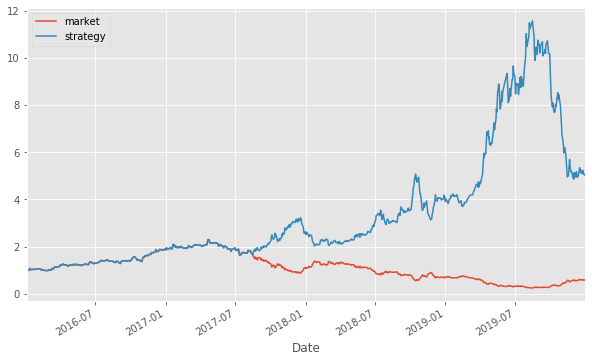

In [12]:
data[['market', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [13]:
arets = data[['market', 'strategy']].mean() * 252  # annualized returns
arets

market     -0.141971
strategy    0.412563
dtype: float64

In [14]:
astds = data[['market', 'strategy']].std() * 252 ** 0.5  # annualized volatility
astds

market      0.396942
strategy    0.396190
dtype: float64

In [ ]:
pip install zipline


In [ ]:
from pyalgotrade import strategy
from pyalgotrade.barfeed import quandlfeed


class MyStrategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument):
        super(MyStrategy, self).__init__(feed)
        self.__instrument = instrument

    def onBars(self, bars):
        bar = bars[self.__instrument]
        self.info(bar.getClose())

